In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [80]:
def blk_scholes(S, K, T, r, voli, payoption):
   
    d1 = (np.log(S / K) + (r + 0.5 * voli ** 2) * T) / (voli * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * voli ** 2) * T) / (voli * np.sqrt(T))
    if payoption == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoption == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
       
    
    return option_value
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #voli: volatility of underlying asset
    #payoption: call or put
     

In [81]:
blk_scholes(200, 202, 1, 0.03, 0.25, 'call')

21.745811067379492

In [83]:
blk_scholes(200, 202, 1, 0.03, 0.25, 'put')

17.77580884417813

In [84]:
#Monte carlo simulation
import numpy as np
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t])    
       
    return S
T = 1
r = 0.03
sigma = 0.2
S0 = 200
K = 202
S = mcs_simulation_np(1000)
S = np.transpose(S)
S

array([[200.        , 199.47832346, 201.03774917, ..., 334.98682978,
        336.87838657, 338.03601062],
       [200.        , 197.84085558, 197.82689256, ..., 184.72738944,
        185.91628459, 185.88366609],
       [200.        , 203.02000264, 202.44449117, ..., 225.25379475,
        229.12367643, 228.15979522],
       ...,
       [200.        , 198.5937863 , 198.8915681 , ..., 301.60260904,
        301.64477971, 299.49384606],
       [200.        , 201.19683751, 201.682889  , ..., 164.65680009,
        165.31910455, 165.46404267],
       [200.        , 201.2671685 , 200.90376007, ..., 134.28850321,
        132.91300291, 134.44084161]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

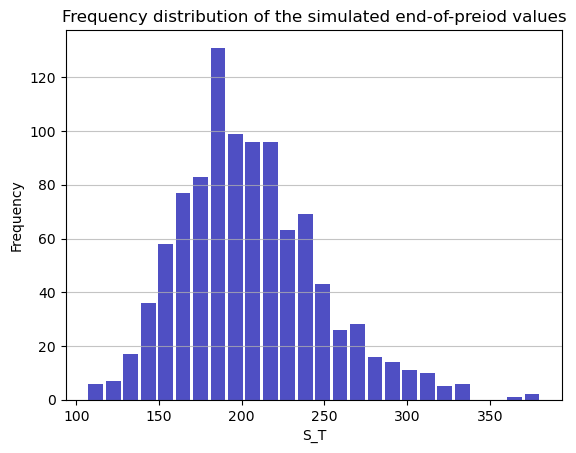

In [85]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [86]:
p = np.exp(-r*T)*np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))


European put 14.522429366598121


In [87]:
c = np.exp(-r*T)*np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 17.43135991502296
